In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 
import pandas as pd
from scipy import interpolate


R = 8.31446261815324
N_A = 6.0221408e+23
k_B = 1.380649e-23

In [3]:
theta = 1160 
M = 0.00901
rho = 1848
alpha = 11.3e-6 
chi = 0.00997e+6 

def fcv(x):
    return x**3 / (np.exp(x)-1)
    
def debye(x):
    return 12*x**(-3)*scipy.integrate.quad(fcv,0,x)[0] - 3*x*1/(np.exp(x) - 1)

def cv(T):
    return 3*R*debye(theta/T)

def cpalt(T):
    return (9*alpha/chi)*(M/rho)*T+cv(T)

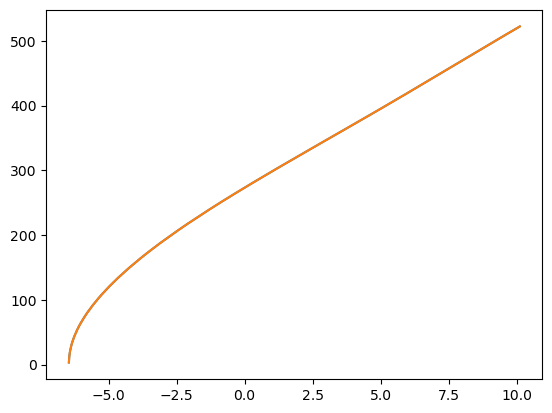

In [4]:
#Evil Data


# Type K Thermocouple Data (NiCr-NiMnAlSi)
# Temperature array (°C) - from -270 to +240 in order
temperature_K = np.array([
    -270, -269, -268, -267, -266, -265, -264, -263, -262, -261,
    -260, -259, -258, -257, -256, -255, -254, -253, -252, -251,
    -250, -249, -248, -247, -246, -245, -244, -243, -242, -241,
    -240, -239, -238, -237, -236, -235, -234, -233, -232, -231,
    -230, -229, -228, -227, -226, -225, -224, -223, -222, -221,
    -220, -219, -218, -217, -216, -215, -214, -213, -212, -211,
    -210, -209, -208, -207, -206, -205, -204, -203, -202, -201,
    -200, -199, -198, -197, -196, -195, -194, -193, -192, -191,
    -190, -189, -188, -187, -186, -185, -184, -183, -182, -181,
    -180, -179, -178, -177, -176, -175, -174, -173, -172, -171,
    -170, -169, -168, -167, -166, -165, -164, -163, -162, -161,
    -160, -159, -158, -157, -156, -155, -154, -153, -152, -151,
    -150, -149, -148, -147, -146, -145, -144, -143, -142, -141,
    -140, -139, -138, -137, -136, -135, -134, -133, -132, -131,
    -130, -129, -128, -127, -126, -125, -124, -123, -122, -121,
    -120, -119, -118, -117, -116, -115, -114, -113, -112, -111,
    -110, -109, -108, -107, -106, -105, -104, -103, -102, -101,
    -100, -99, -98, -97, -96, -95, -94, -93, -92, -91,
    -90, -89, -88, -87, -86, -85, -84, -83, -82, -81,
    -80, -79, -78, -77, -76, -75, -74, -73, -72, -71,
    -70, -69, -68, -67, -66, -65, -64, -63, -62, -61,
    -60, -59, -58, -57, -56, -55, -54, -53, -52, -51,
    -50, -49, -48, -47, -46, -45, -44, -43, -42, -41,
    -40, -39, -38, -37, -36, -35, -34, -33, -32, -31,
    -30, -29, -28, -27, -26, -25, -24, -23, -22, -21,
    -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
    -10, -9, -8, -7, -6, -5, -4, -3, -2, -1,
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
    10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
    20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
    30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
    40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
    50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
    60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
    70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
    80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
    90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
    100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
    110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
    120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
    130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
    140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
    150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
    160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
    170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
    180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
    190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
    200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
    210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
    220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
    230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
    240, 241, 242, 243, 244, 245, 246, 247, 248, 249
])

# Voltage array (mV) - now in consistent increasing order
voltage_K = [
    -6.458, -6.457, -6.456, -6.455, -6.453, -6.452, -6.450, -6.448, -6.446, -6.444,
    -6.441, -6.438, -6.435, -6.432, -6.429, -6.425, -6.421, -6.417, -6.413, -6.408,
    -6.404, -6.399, -6.393, -6.388, -6.382, -6.377, -6.370, -6.364, -6.358, -6.351,
    -6.344, -6.337, -6.329, -6.322, -6.314, -6.306, -6.297, -6.289, -6.280, -6.271,
    -6.262, -6.252, -6.243, -6.233, -6.223, -6.213, -6.202, -6.192, -6.181, -6.170,
    -6.158, -6.147, -6.135, -6.123, -6.111, -6.099, -6.087, -6.074, -6.061, -6.048,
    -6.035, -6.021, -6.007, -5.994, -5.980, -5.965, -5.951, -5.936, -5.922, -5.907,
    -5.891, -5.876, -5.861, -5.845, -5.829, -5.813, -5.797, -5.780, -5.763, -5.747,
    -5.730, -5.713, -5.695, -5.678, -5.660, -5.642, -5.624, -5.606, -5.588, -5.569,
    -5.550, -5.531, -5.512, -5.493, -5.474, -5.454, -5.435, -5.415, -5.395, -5.374,
    -5.354, -5.333, -5.313, -5.292, -5.271, -5.250, -5.228, -5.207, -5.185, -5.163,
    -5.141, -5.119, -5.097, -5.074, -5.052, -5.029, -5.006, -4.983, -4.960, -4.936,
    -4.913, -4.889, -4.865, -4.841, -4.817, -4.793, -4.768, -4.744, -4.719, -4.694,
    -4.669, -4.644, -4.618, -4.593, -4.567, -4.542, -4.516, -4.490, -4.463, -4.437,
    -4.411, -4.384, -4.357, -4.330, -4.303, -4.276, -4.249, -4.221, -4.194, -4.166,
    -4.138, -4.110, -4.082, -4.054, -4.025, -3.997, -3.968, -3.939, -3.911, -3.882,
    -3.852, -3.823, -3.794, -3.764, -3.734, -3.705, -3.675, -3.645, -3.614, -3.584,
    -3.554, -3.523, -3.492, -3.462, -3.431, -3.400, -3.368, -3.337, -3.306, -3.274,
    -3.243, -3.211, -3.179, -3.147, -3.115, -3.083, -3.050, -3.018, -2.986, -2.953,
    -2.920, -2.887, -2.854, -2.821, -2.788, -2.755, -2.721, -2.688, -2.654, -2.620,
    -2.587, -2.553, -2.519, -2.485, -2.450, -2.416, -2.382, -2.347, -2.312, -2.278,
    -2.243, -2.208, -2.173, -2.138, -2.103, -2.067, -2.032, -1.996, -1.961, -1.925,
    -1.889, -1.854, -1.818, -1.782, -1.745, -1.709, -1.673, -1.637, -1.600, -1.564,
    -1.527, -1.490, -1.453, -1.417, -1.380, -1.343, -1.305, -1.268, -1.231, -1.194,
    -1.156, -1.119, -1.081, -1.043, -1.006, -0.968, -0.930, -0.892, -0.854, -0.816,
    -0.778, -0.739, -0.701, -0.663, -0.624, -0.586, -0.547, -0.508, -0.470, -0.431,
    -0.392, -0.353, -0.314, -0.275, -0.236, -0.197, -0.157, -0.118, -0.079, -0.039,
    0.000, 0.039, 0.079, 0.119, 0.158, 0.198, 0.238, 0.277, 0.317, 0.357,
    0.397, 0.437, 0.477, 0.517, 0.557, 0.597, 0.637, 0.677, 0.718, 0.758,
    0.798, 0.838, 0.879, 0.919, 0.960, 1.000, 1.041, 1.081, 1.122, 1.163,
    1.203, 1.244, 1.285, 1.326, 1.366, 1.407, 1.448, 1.489, 1.530, 1.571,
    1.612, 1.653, 1.694, 1.735, 1.776, 1.817, 1.858, 1.899, 1.941, 1.982,
    2.023, 2.064, 2.106, 2.147, 2.188, 2.230, 2.271, 2.312, 2.354, 2.395,
    2.436, 2.478, 2.519, 2.561, 2.602, 2.644, 2.685, 2.727, 2.768, 2.810,
    2.851, 2.893, 2.934, 2.976, 3.017, 3.059, 3.100, 3.142, 3.184, 3.225,
    3.267, 3.308, 3.350, 3.391, 3.433, 3.474, 3.516, 3.557, 3.599, 3.640,
    3.682, 3.723, 3.765, 3.806, 3.848, 3.889, 3.931, 3.972, 4.013, 4.055,
    4.096, 4.138, 4.179, 4.220, 4.262, 4.303, 4.344, 4.385, 4.427, 4.468,
    4.509, 4.550, 4.591, 4.633, 4.674, 4.715, 4.756, 4.797, 4.838, 4.879,
    4.920, 4.961, 5.002, 5.043, 5.084, 5.124, 5.165, 5.206, 5.247, 5.288,
    5.328, 5.369, 5.410, 5.450, 5.491, 5.532, 5.572, 5.613, 5.653, 5.694,
    5.735, 5.775, 5.815, 5.856, 5.896, 5.937, 5.977, 6.017, 6.058, 6.098,
    6.138, 6.179, 6.219, 6.259, 6.299, 6.339, 6.380, 6.420, 6.460, 6.500,
    6.540, 6.580, 6.620, 6.660, 6.701, 6.741, 6.781, 6.821, 6.861, 6.901,
    6.941, 6.981, 7.021, 7.060, 7.100, 7.140, 7.180, 7.220, 7.260, 7.300,
    7.340, 7.380, 7.420, 7.460, 7.500, 7.540, 7.579, 7.619, 7.659, 7.699,
    7.739, 7.779, 7.819, 7.859, 7.899, 7.939, 7.979, 8.019, 8.059, 8.099,
    8.138, 8.178, 8.218, 8.258, 8.298, 8.338, 8.378, 8.418, 8.458, 8.499,
    8.539, 8.579, 8.619, 8.659, 8.699, 8.739, 8.779, 8.819, 8.860, 8.900,
    8.940, 8.980, 9.020, 9.061, 9.101, 9.141, 9.181, 9.222, 9.262, 9.302,
    9.343, 9.383, 9.423, 9.464, 9.504, 9.545, 9.585, 9.626, 9.666, 9.707,
    9.747, 9.788, 9.828, 9.869, 9.909, 9.950, 9.991, 10.031, 10.072, 10.113
]

voltage_to_temp = interpolate.interp1d(voltage_K, temperature_K+273.15, kind='cubic', fill_value='extrapolate')

plt.plot(voltage_K,temperature_K+273.15)
plt.plot(voltage_K,voltage_to_temp(voltage_K))

0.000982178629965918
0.0012832029388403492
temperature: 299.1721990706895


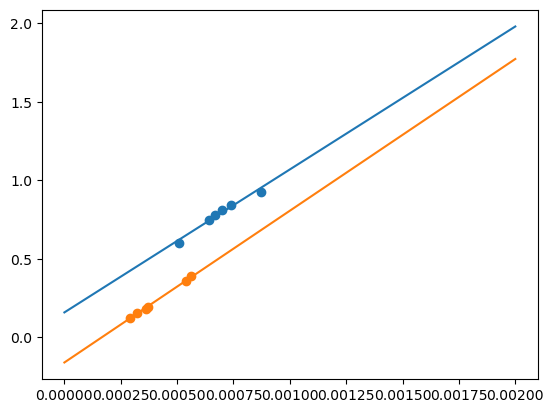

In [5]:
# Calibration

preup = [0.87e-3,0.51e-3,0.74e-3,0.7e-3,0.67e-3,0.64e-3]
posup = [0.927,0.599,0.843,0.812,0.78,0.75]
#preup = [0.74e-3,0.7e-3,0.67e-3,0.64e-3]
#posup = [0.843,0.812,0.78,0.75]

calibup = np.polyfit(preup,posup,1)
xup = np.linspace(0,0.002,1000)
fitup = calibup[0]*xup + calibup[1]

plt.figure()
plt.scatter(preup,posup)
plt.plot(xup,fitup)




predown = [0.29e-3,0.32e-3,0.36e-3,0.37e-3,0.54e-3,0.56e-3]
posdown = [122.3e-3,151.6e-3,180.4e-3,194.9e-3,355.2e-3,387.4e-3]

calibdown = np.polyfit(predown,posdown,1) #CALIBRATION CURVE
xdown = np.linspace(0,0.002,1000)
fitdown = calibdown[0]*xdown + calibdown[1]

plt.scatter(predown,posdown)
plt.plot(xdown,fitdown)


def fcsample(x):
    return calibup[0]*x + calibup[1]

def inv_fcsample(x):
    return (x-calibup[1])/calibup[0]

def fcbackground(x):
    return calibdown[0]*x + calibdown[1]

def inv_fcbackground(x):
    return (x-calibdown[1])/calibdown[0]

print((1.053-calibup[1])/calibup[0])
print((1.080-calibdown[1])/calibdown[0])
#print(calibdown[0])


def v_to_k(V,calib,ten_amp = False):
    V_step = calib[0]*V + calib[1]
    if ten_amp == True:
        return voltage_to_temp(V_step*8.52)
    return voltage_to_temp(V_step)


print('temperature:',v_to_k(9.7000002861E-4,calibup))




In [6]:
#Measurement 1
t=300
I= 0.45
dT= 5
C_p = cpalt(22+273.15)

V = C_p*dT/(I*t)
print(V)


current_temp = 21.5+273.15
background = 23 +273.15

mvt_sample = np.array([2.893e-3])#roomt temp +5 +5, mV
mvt_sample_c = fcsample(mvt_sample)


mvt_back = np.array([2.893e-3])
mvt_back_c = fcbackground(mvt_back)


#(SAMPLE)
#1.061e-3 = starting temperature, calibrated: 1.1248
#1.202e-3 = target, calibrated: 1.2533
print('SAMPLE: ',mvt_sample_c)

print('BACKGROUND:',mvt_back_c)

print('SAMPLE INVERSE:',inv_fcsample(1.355))
print('BACKGROUND INVERSE:',inv_fcbackground(1.333))

0.47442234762847263
SAMPLE:  [2.79467041]
BACKGROUND: [2.63745017]
SAMPLE INVERSE: 0.0013135088586518193
BACKGROUND INVERSE: 0.001544706429497094


In [7]:
# Calibration

preup = [0.87e-3,0.51e-3,0.74e-3,0.7e-3,0.67e-3,0.64e-3]
posup = [0.927,0.599,0.843,0.812,0.78,0.75]

new_pre_up = [-5.69e-3, -5.59e-3, 0.78e-3, 0.83e-3, 0.85e-3]  # 0.81e-3
new_pos_up = np.array([-5.510, -5.417, 0.617, 0.622, 0.633])  # 0.633
#preup = [0.74e-3,0.7e-3,0.67e-3,0.64e-3]
#posup = [0.843,0.812,0.78,0.75]

calibup = np.polyfit(preup,posup,1)
calibup1 = np.polyfit(new_pre_up,new_pos_up,1)
xup = np.linspace(0,0.002,1000)
fitup = calibup[0]*xup + calibup[1]

#plt.figure()
#plt.scatter(preup,posup)
#plt.plot(xup,fitup)




predown = [0.29e-3,0.32e-3,0.36e-3,0.37e-3,0.54e-3,0.56e-3]
posdown = [122.3e-3,151.6e-3,180.4e-3,194.9e-3,355.2e-3,387.4e-3]

calibdown = np.polyfit(predown,posdown,1) #CALIBRATION CURVE
xdown = np.linspace(0,0.002,1000)
fitdown = calibdown[0]*xdown + calibdown[1]

#plt.scatter(predown,posdown)
#plt.plot(xdown,fitdown)


def fcsample(x):
    return calibup[0]*x + calibup[1]

def inv_fcsample(x):
    return (x-calibup[1])/calibup[0]

def fcbackground(x):
    return calibdown[0]*x + calibdown[1]

def inv_fcbackground(x):
    return (x-calibdown[1])/calibdown[0]







#Work with this:
print('SAMPLE: ',fcsample(2.893e-3))
print('BACKGROUND:',fcbackground(2.893e-3))
print('SAMPLE INVERSE:',inv_fcsample(1.355))
print('BACKGROUND INVERSE:',inv_fcbackground(1.333))

SAMPLE:  2.7946704055015434
BACKGROUND: 2.6374501718907997
SAMPLE INVERSE: 0.0013135088586518193
BACKGROUND INVERSE: 0.001544706429497094


In [8]:
data1names = ['27-32','32-37','37-42','42-47','47-52','52-62','62-72','72-82','82-92','92-100']
data2names = ['-189 to -179','-179 to -164', '-164 to -149', '-149 to -134', '-134 to -114','-114 to -94', '-84 to -64', '-64 to -44', '-44 to -24', '-24 to -14', '-14 to 6', '6 to 26']

def polynomial(c,x,ten_amp = False):
    result = 0
    for j in range(len(c)):
        result += c[j] * x**(len(c)-(j+1))
    if ten_amp == True:
        return result / 10
    return result   
    
def line_find(t,v,llim,rlim):
    for i in range(len(t)):
        if llim < t[i]:
            v_arr_l = np.zeros(i)
            t_l = np.zeros(i)
            for k in range(i):
                v_arr_l[k] = v[k]
                t_l[k] = t[k]

                
            l_c = np.polyfit(t_l,v_arr_l,1)
            #plt.scatter(t_l[-1],v_arr_l[-1],color = 'black')
            break
    for j in range(len(t)):
        if rlim > t[-1-j]:
            v_arr_r = np.zeros(j)
            t_r = np.zeros(j)
            for k in range(j):
                v_arr_r[-1-k] = v[-1-k]
                t_r[-1-k] = t[-1-k]
                
            
            r_c = np.polyfit(t_r,v_arr_r,1)
            #plt.scatter(t_r[0],v_arr_r[0],color = 'black')
            break
    return l_c, r_c

def intersect(x,line1):
    for i in range(len(line1)):
        if x < line1[i]:
            intersect_index = i-1
            break
    return intersect_index

def int_poly(c,a,b):
    cint = np.zeros(len(c)+1)
    for j in range(len(c)):
        cint[j]=c[j]/(len(c)-j)
    return polynomial(cint,b)-polynomial(cint,a)

def integral_diff(line1,line2,curve,start,end,x):
    int1 = int_poly(curve,start,x)-int_poly(line1,start,x)
    int2 = int_poly(line2,x,end)-int_poly(curve,x,end)
    return int1-int2

def bisection(f,a,b,tol=1e-10):
    if a>b:
        t = a; a = b; b= t

    fa = f(a); fb = f(b)
    if fa*fb > 0: raise ValueError

    v = 1
    if fa>0: v=-1
    x = 0.5*(a+b)
    k = 1
    while (b-a>tol) and (a<x) and (x<b):
        if v*f(x)>0: b = x
        else: a=x
        x = 0.5*(a+b)
        k+=1
    return x
    
def function(filename,window,pod,llim,rlim,calib,first,ten_amp = False):
    if first == True:
        df = pd.read_csv('Data1/Starttemp '+ filename + '.txt', sep=r'\s+')
        MN = '1'
    else:
        df = pd.read_csv('Data2/Starttemp '+ filename + '.txt', sep=r'\s+')
        MN = '2'
    time = df['Time'].to_numpy()#MeV
    voltage = df['Voltage'].to_numpy()
    voltage = v_to_k(voltage*10**(-3),calib,ten_amp)
    voltage_smoothed = np.convolve(voltage, np.ones(window)/window, mode='valid')
    time_smoothed = np.convolve(time, np.ones(window)/window, mode='valid')


    
    c = np.polyfit(time_smoothed,voltage_smoothed,pod)
    plt.figure()
    #plt.plot([llim,llim],[0,10e9],color = 'purple')
    #plt.plot([rlim,rlim],[0,10e9],color = 'purple')
    plt.ylim(np.min(voltage),np.max(voltage))
    plt.plot(time,voltage, label = 'Raw Data')
    #plt.plot(time_smoothed,voltage_smoothed,color = 'r')
    plt.plot(time_smoothed,polynomial(c,time_smoothed),color = 'b', label = 'Polynomial Approx. of Smooth')
    c_l,c_r=line_find(time_smoothed,voltage_smoothed,llim,rlim)
    plt.plot(time,polynomial(c_l,time))
    plt.plot(time,polynomial(c_r,time))
    intbis = lambda x: integral_diff(c_l,c_r,c,np.min(time_smoothed),np.max(time_smoothed),x)
    zero = bisection(intbis,llim,rlim,tol=1e-12)
    plt.plot([zero,zero],[0,10e9],color = 'black', label = 'T_x')
    inter_i = intersect(zero,time)
    plt.scatter([time[inter_i],time[inter_i]],[polynomial(c_l,time)[inter_i],polynomial(c_r,time)[inter_i]])
    plt.grid()
    plt.title('Temperature over Time for ' + filename + ' degrees celsius (Measurment '+ MN + ')' )
    plt.xlabel('Time (ms)')
    plt.ylabel('Approximate Temperature (K)')
    plt.legend()
    plt.savefig(filename + '.png')
    return polynomial(c_r,time)[inter_i]-polynomial(c_l,time)[inter_i]
    
#llims = [0.7e6,0.4e6,0.4e6,0.25e6,0.25e6,0.4e6,0.6e6,0.8e6,0.7e6,0.75e6]
#rlims = [1.1e6,0.8e6,0.8e6,0.45e6,0.6e6,0.9e6,1.0e6,1.4e6,1.3e6,1.3e6]

#DeltaTtry = np.zeros(len(data1names))
#polynomial_order = 20
#zeros = np.zeros(len(data1names))
#for j in range(len(data1names)):
#    DeltaTtry[j] = function(data1names[j],20,polynomial_order,llims[j],rlims[j],calibup)


#print(DeltaTtry)
#print('zero:', function(data1names[0],20,polynomial_order,0.7e6,1.1e6))

#def raw_read(filename):
#    df = pd.read_csv('Data2/Starttemp '+ filename + '.txt', sep=r'\s+')
#    time = df['Time'].to_numpy()#MeV
#    voltage = df['Voltage'].to_numpy()
#    plt.figure()
    #plt.ylim(np.min(voltage),np.max(voltage))
#    plt.plot(time,voltage)

#raw_read(data2names[11])
#llim2 = [0.5e+6,0.7e+6,0.6e+6,0.4e+6,0.5e+6,0.2e+6,0.6e+6,0.4e+6,0.3e+6,0.2e+6,0.2e+6,0.4e+6,0.3e+6]
#rlim2 = [0.9e+6,0.95e+6,0.95e+6,0.8e+6,1.08e+6,1.1e6,1.3e+6,1.1e+6,1.3e+6,0.7e+6,0.65e+6,1.2e+6,0.9e+6]

In [9]:
# WIRE HEAT CAPACITY

alpha_w = 16.5e-6
chi_w = 7.26e-12
theta_w = 343.5
rho_w = 8.94e+3
M_w = 63.55e-3


def fcv(x):
    return x**3 / (np.exp(x)-1)
    
def debye(x):
    return 12*x**(-3)*scipy.integrate.quad(fcv,0,x)[0] - 3*x*1/(np.exp(x) - 1)

def cv(T,theta):
    return 3*R*debye(theta/T)

def cp(T,theta,rho,M,alpha,chi):
    print((9*alpha**2/chi)*(M/rho)*T)
    return (9*(alpha)**2/chi)*(M/rho)*T+cv(T,theta)



print(cp(237.15,theta_w,rho_w,M_w,alpha_w,chi_w))


0.5689511010906041
23.079849635036037


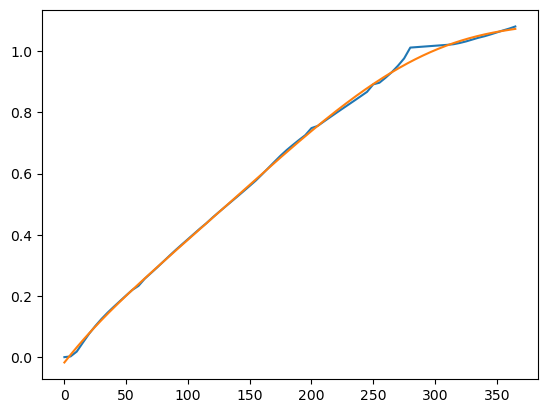

In [10]:
#Teflon Heat Capacity


T_teflon = [
    0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95,
    100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170,
    175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245,
    250, 255, 260, 265, 270, 275, 280, 310, 315, 320, 325, 330, 335, 340, 345,
     355, 360, 365
]

cV_teflon = [
    0, 0.0024, 0.0182, 0.0477, 0.0764, 0.1016, 0.1247, 0.1455, 0.1647, 0.1833,
    0.2017, 0.2198, 0.2330, 0.2562, 0.2745, 0.2929, 0.3120, 0.3312, 0.3500, 0.3680,
    0.3857, 0.4035, 0.4212, 0.4380, 0.4566, 0.4740, 0.4910, 0.5080, 0.5250, 0.5423,
    0.5598, 0.5775, 0.5975, 0.6180, 0.6385, 0.6587, 0.6772, 0.6940, 0.7102, 0.7257,
    0.7488, 0.7558, 0.7701, 0.7842, 0.7982, 0.8120, 0.8257, 0.8394, 0.8533, 0.8673,
    0.8918, 0.8971, 0.9135, 0.9315, 0.9526, 0.9765, 1.012, 1.021, 1.023, 1.027,
    1.032, 1.038, 1.044, 1.049, 1.055, 1.068, 1.074, 1.081
]

teflon_x = np.linspace(np.min(T_teflon),np.max(T_teflon),1000)
plt.plot(T_teflon,cV_teflon)
c_teflon = np.polyfit(T_teflon,cV_teflon,5)
plt.plot(teflon_x,polynomial(c_teflon,teflon_x))

In [11]:
#DATA

data1names = ['27 to 32','32 to 37','37 to 42','42 to 47','47 to 52','52 to 62','62 to 72','72 to 82','82 to 92','92 to 100']
#data2names = ['-189 to -179','-179 to -164', '-164 to -149', '-149 to -134', '-134 to -114','-114 to -94', '-84 to -64', '-64 to -44', '-44 to -24', '-24 to -14', '-14 to 6', '6 to 26']
data2names = ['-189 to -179','-179 to -164', '-164 to -149', '-149 to -134', '-134 to -114','-114 to -94', '-84 to -64', '-64 to -44', '-44 to -24', '-24 to -14', '-14 to 6', '6 to 26','26 to 32','32 to 42','42 to 52']


llims = [0.7e6,0.4e6,0.4e6,0.25e6,0.25e6,0.4e6,0.6e6,0.8e6,0.7e6,0.75e6]
rlims = [1.1e6,0.8e6,0.8e6,0.45e6,0.6e6,0.9e6,1.0e6,1.4e6,1.3e6,1.3e6]


#llims2 = [0.5e+6,0.7e+6,0.6e+6,0.4e+6,0.5e+6,0.2e+6,0.6e+6,0.4e+6,0.3e+6,0.2e+6,0.2e+6,0.4e+6,0.3e+6]
#rlims2 = [0.9e+6,0.95e+6,0.95e+6,0.8e+6,1.08e+6,1.1e6,1.3e+6,1.1e+6,1.3e+6,0.7e+6,0.65e+6,1.2e+6,0.9e+6]


#llims2 = [0.5e+6,0.7e+6,0.6e+6,0.4e+6,0.5e+6,0.2e+6,0.6e+6,0.4e+6,0.3e+6,0.2e+6,0.7e+6,0.4e+6]
#rlims2 = [0.9e+6,0.95e+6,0.95e+6,0.8e+6,1.08e+6,1.1e6,1.3e+6,1.1e+6,1.3e+6,0.7e+6,1.0e+6,0.9e+6]


llims2 = [0.5e+6,0.7e+6,0.6e+6,0.4e+6,0.5e+6,0.2e+6,0.6e+6,0.4e+6,0.3e+6,0.2e+6,0.7e+6,0.4e+6,0.2e+6,0.2e+6,0.2e+6]
rlims2 = [0.9e+6,0.95e+6,0.95e+6,0.8e+6,1.08e+6,1.1e6,1.3e+6,1.1e+6,1.3e+6,0.7e+6,1.0e+6,0.9e+6,0.7e+6,0.6e+6,0.8e+6]




print(len(llims2))
print(len(data2names))

15
15


[ 89.15 101.65 116.65 131.65 149.15 169.15 189.15 209.15 229.15 199.15
 219.15 239.15 254.15 269.15 289.15 296.15 302.15 310.15 320.15 330.15
 340.15 350.15 360.15 369.15]


C:\Users\Nikita\AppData\Local\Temp\ipykernel_8372\129087879.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[-1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
 -1000 -1000  4378  1272  4446 11141  7149  3317  3523  2043  3035  3060]
[  189   350   524   710   839   996  1249  1329  1491  3064  2870  2007
   497  4112  2950 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000]


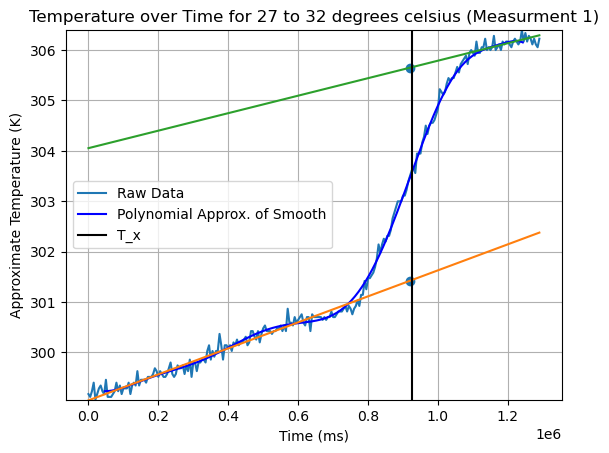

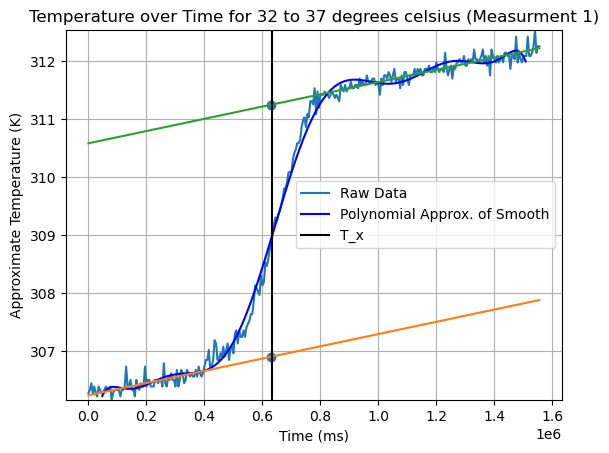

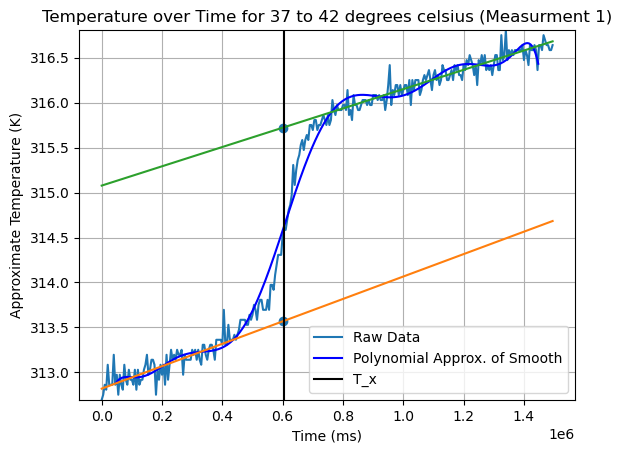

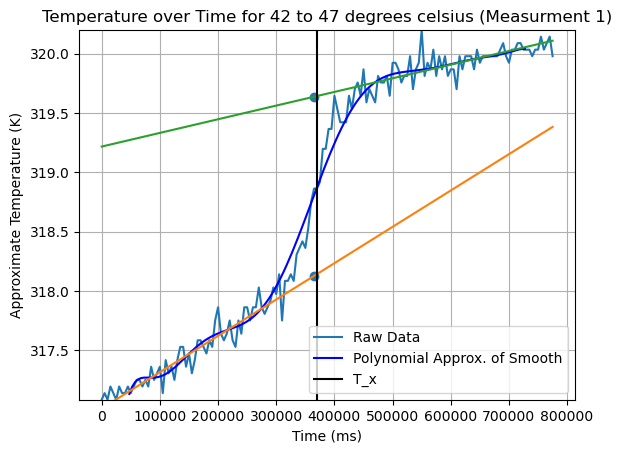

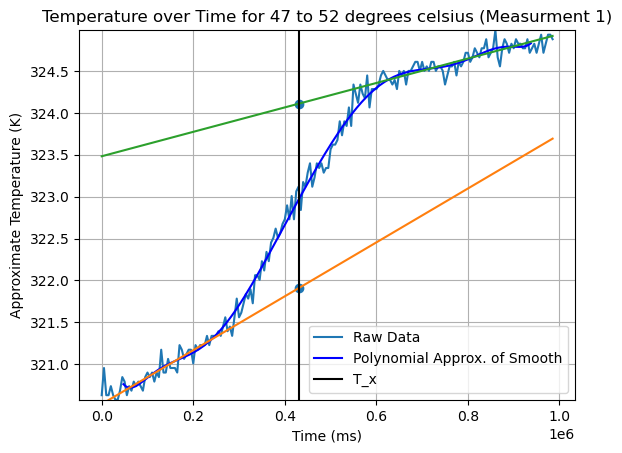

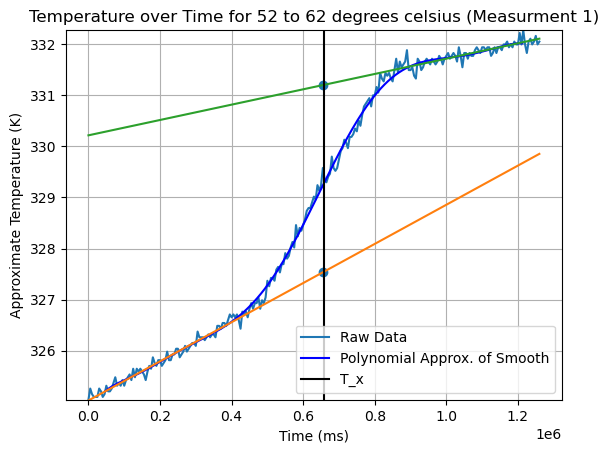

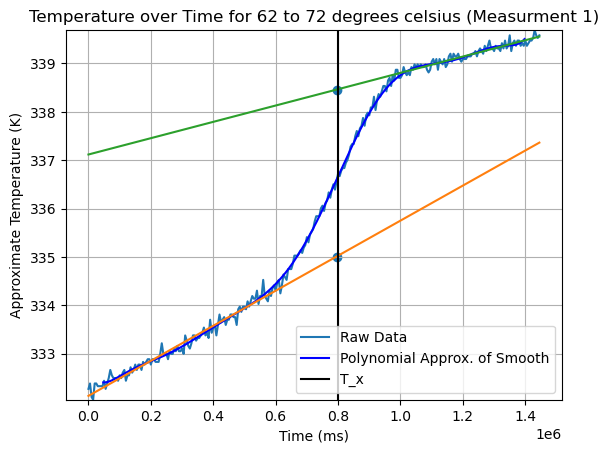

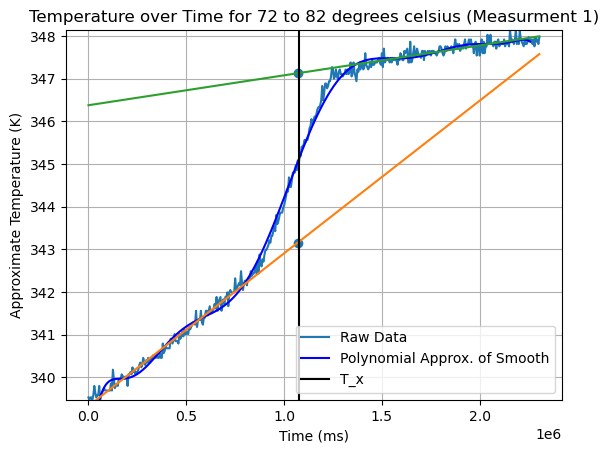

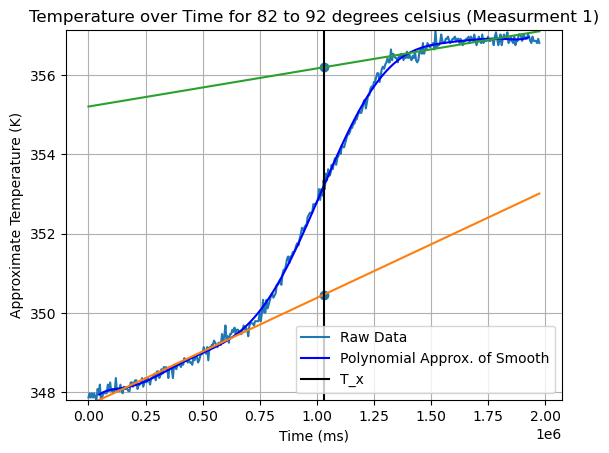

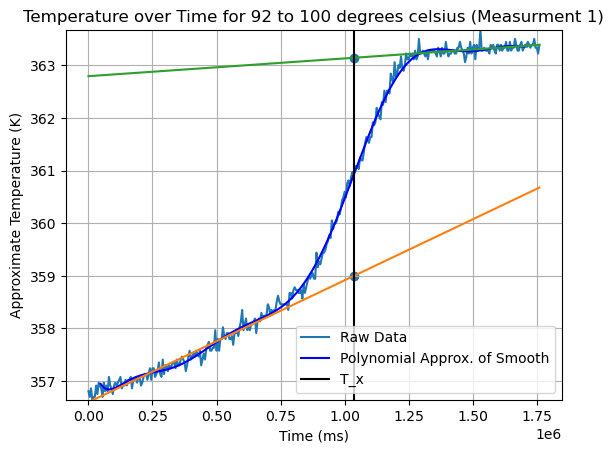

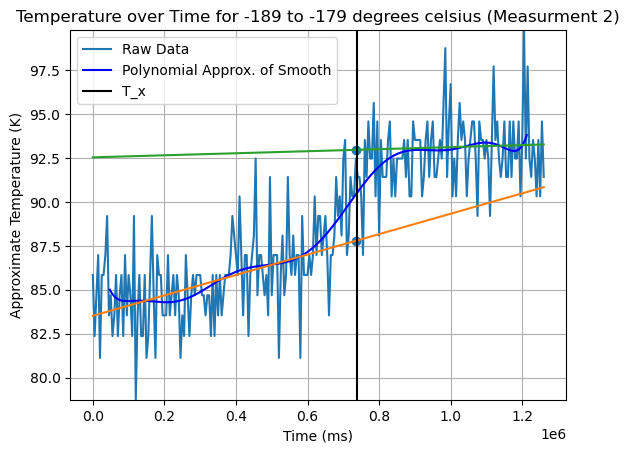

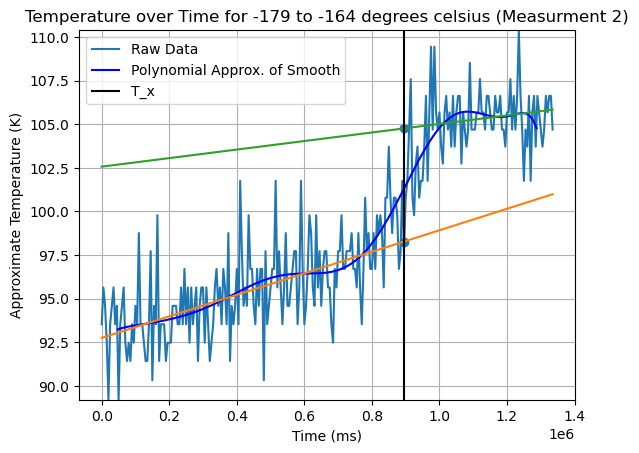

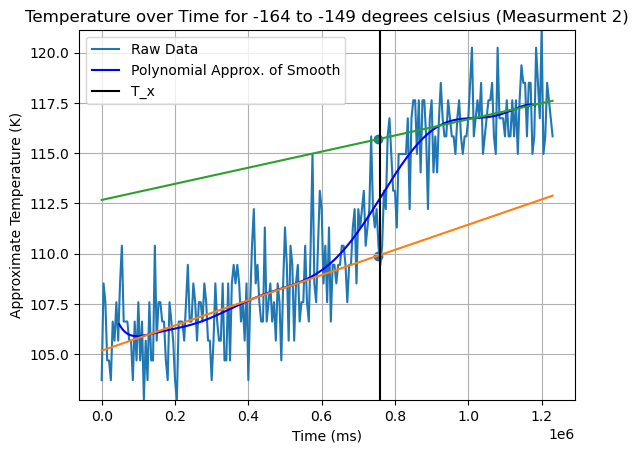

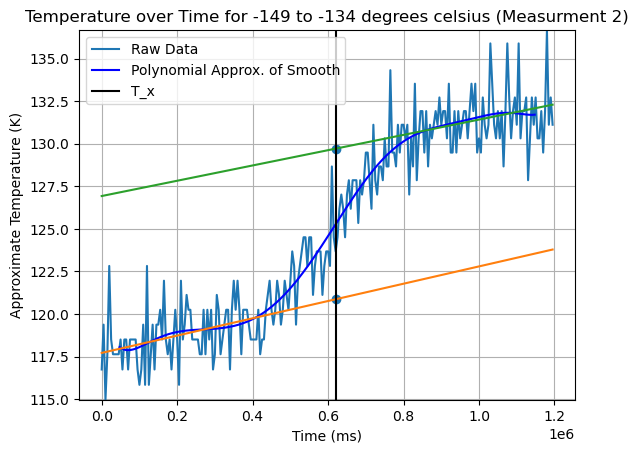

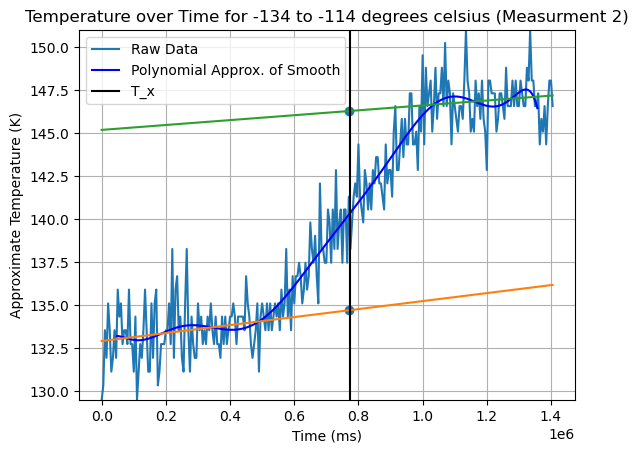

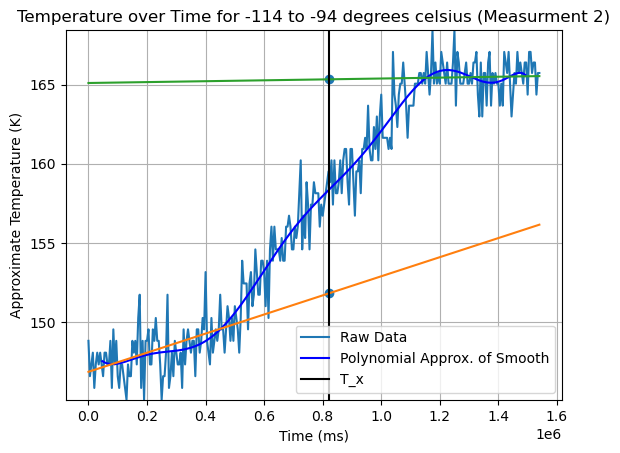

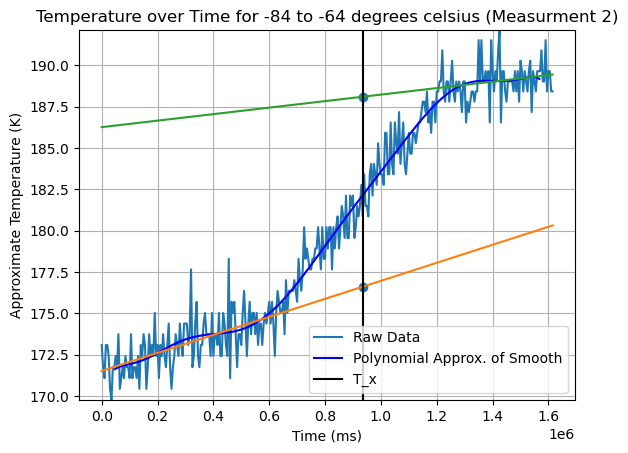

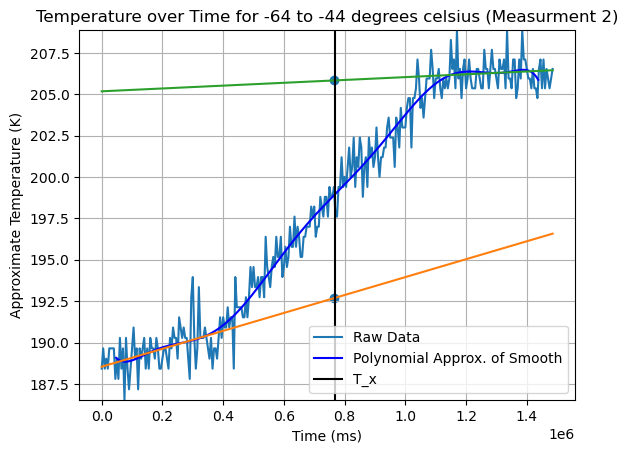

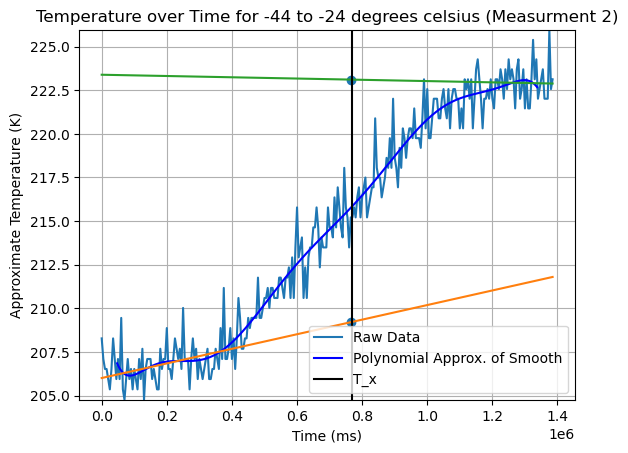

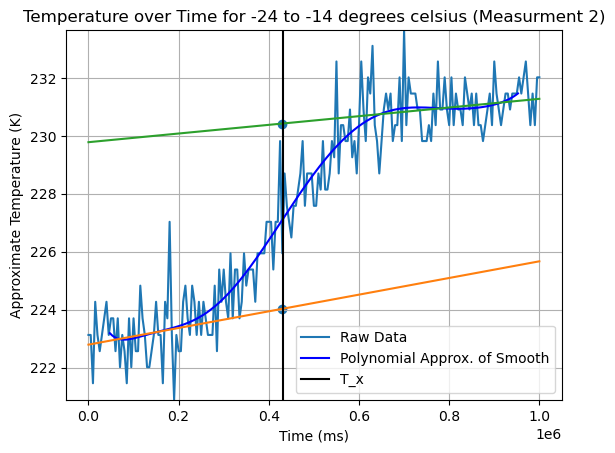

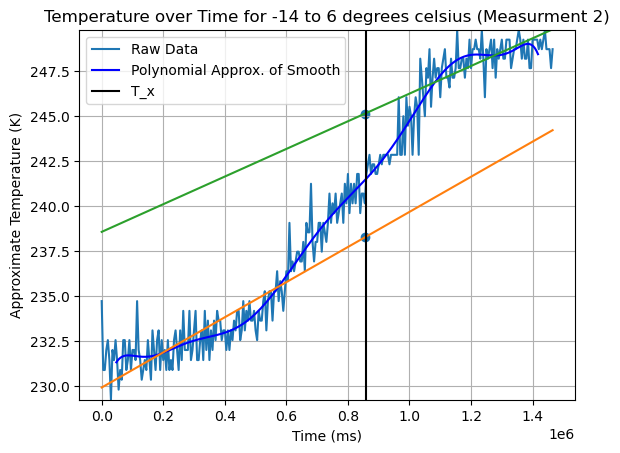

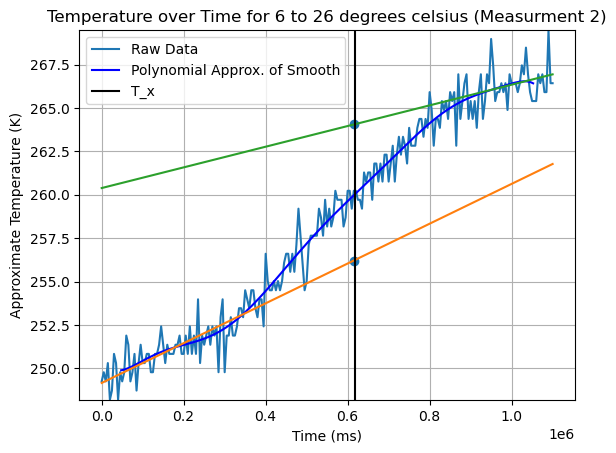

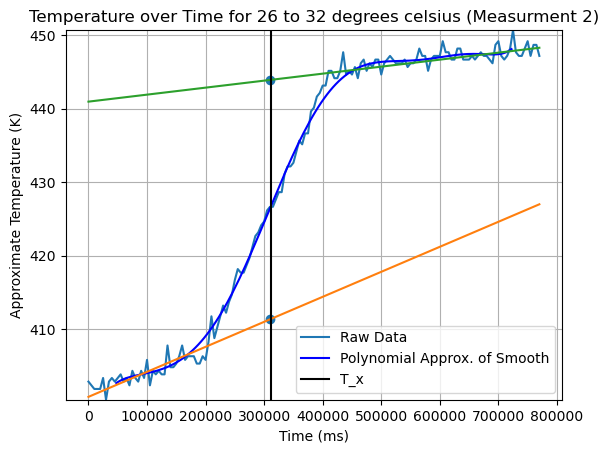

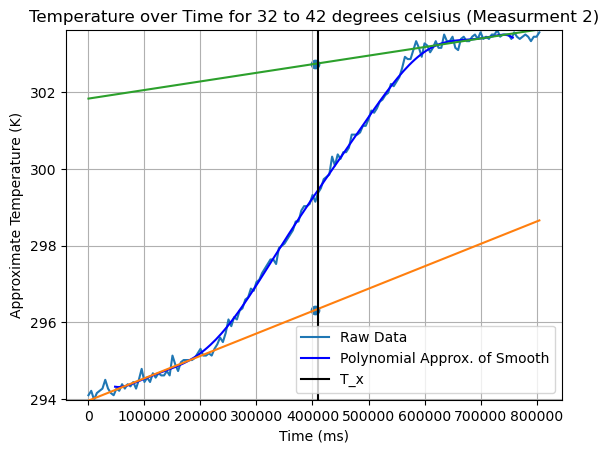

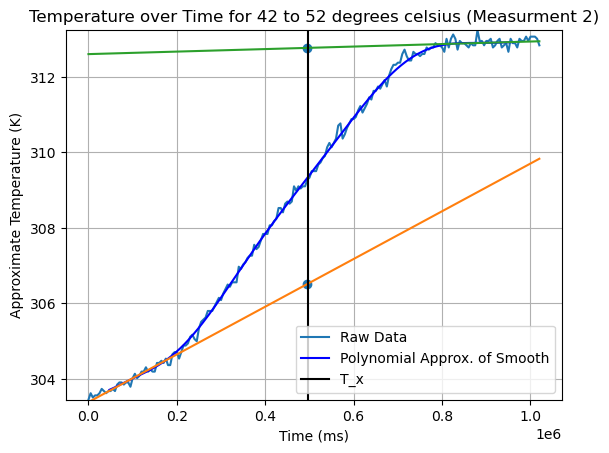

In [12]:
#Heat Capacity Calculations

# Temperature ranges (using middle temperature)
temperatures_middle = np.array([
    -184,   # (-189 to -179)
    -171.5, # (-179 to -164)
    -156.5, # (-164 to -149)
    -141.5, # (-149 to -134)
    -124,   # (-134 to -114)
    -104,   # (-114 to -94)
    -84,    # (-94 to -74)
    -64,    # (-74 to -54)
    -44,    # (-54 to -34)
    -74,    # (-84 to -64)
    -54,    # (-64 to -44)
    -34,    # (-44 to -24)
    -19,    # (-24 to -14)
    -4,     # (-14 to 6)
    16,     # (6 to 26)
    23,     # (20 to 26)
    29,     # (26 to 32)
    37,     # (32 to 42)
    47,     # (42 to 52)
    57,     # (52 to 62)
    67,     # (62 to 72)
    77,     # (72 to 82)
    87,     # (82 to 92)
    96      # (92 to 100)
])

temperatures_middle += 273.15

print(temperatures_middle)

# Heating current (A) - converted from mA
heating_current = [
    0.4845, 0.4855, 0.4854, 0.4847, 0.4854, 0.4834, 0.4846, 0.4844, 0.4839,
    0.4860, 0.4859, 0.4826, 0.4843, 0.4842, 0.4835,
    0.48385, 0.4827, 0.4838, 0.4841, 0.4660, 0.4660, 0.4655, 0.4640, 0.4630
]

# Heating voltage ranges (using midpoint of each range, fixed reversed values)
heating_voltage = [
    1.5,    # (1.25 to 1.75)
    1.9895, # (1.927 to 2.052)
    2.5275, # (2.381 to 2.674)
    3.034,  # (2.803 to 3.265)
    3.74,   # (3.546 to 3.934)
    4.325,  # (4.098 to 4.552)
    4.924,  # (4.783 to 5.065)
    5.583,  # (5.404 to 5.762)
    5.995,  # (5.85 to 6.14)
    5.6555, # (5.431 to 5.88)
    6.215,  # (5.99 to 6.44)
    6.695,  # (6.46 to 6.93)
    7.155,  # (7 to 7.31)
    7.63,   # (7.37 to 7.89)
    7.085,  # (6.3 to 7.87) - fixed reversed range
    7.655,  # (7.61 to 7.7)
    8.17,   # (8.13 to 8.21)
    8.355,  # (8.31 to 8.4)
    5.825,  # (5.8 to 5.85)
    5.331,  # (5.304 to 5.358)
    5.331,  # (5.304 to 5.358)
    5.4915, # (5.432 to 5.551)
    6.093,  # (5.584 to 6.602)
    5.6145  # (5.594 to 5.635) - fixed reversed range
]

# Heating time in seconds (converted from MM:SS, NA replaced with 7:30 = 450 seconds)
heating_time = [
    131,    # 02:11
    223,    # 03:43
    232,    # 03:52
    399,    # 06:39
    500,    # NA -> 7:30
    600,    # NA -> 7:30
    558,    # 09:18
    600,    # NA -> 7:30
    663,    # 11:03
    655,    # 10:55
    600,    # NA -> 7:30
    450,    # NA -> 7:30
    450,    # NA -> 7:30
    656,    # 10:56
    496,    # 08:16
    139,    # 02:19
    223,    # 03:43
    380,    # 06:20
    511,    # 08:31
    450,    # NA -> 7:30
    450,    # NA -> 7:30
    294,    # 04:54
    567,    # 09:27
    450     # NA -> 7:30
]


M_be = 0.00901
rho_be = 1848
alpha_be = 11.4e-6 
chi_be = 7.7e-12 


alpha_w = 16.5e-6
chi_w = 7.26e-12
theta_w = 343.5
rho_w = 8.94e+3
M_w = 63.55e-3


m_be = 91.16e-3
m_wire = 1.85e-3
m_teflon = 2e-3


def fcv(x):
    return x**3 / (np.exp(x)-1)
    
def debye(x):
    return 12*x**(-3)*scipy.integrate.quad(fcv,0,x)[0] - 3*x/(np.exp(x) - 1)

def cv(T,theta,M):
    return 3*R*debye(theta/T)/M
    

def cp(T,theta,rho,M,alpha,chi):
    (9*alpha**2/chi)*(M/rho)*T
    return (9*(alpha)**2/chi)*(M/rho)*T+cv(T,theta,M)


def cv_final(T_middle,V,I,t,datanames,polynomial_order,llims,rlims,calib,first,ten_amp = False):
    c_wire = cp(T_middle,theta_w,rho_w,M_w,alpha_w,chi_w)
    cp_teflon = polynomial(c_teflon,T_middle)*1000
    deltaT = function(datanames,20,polynomial_order,llims,rlims,calib,first,ten_amp)
    
    cpbe=(V*I*t/(deltaT*m_be)) - m_wire*c_wire/m_be- m_teflon*cp_teflon/m_be
    result = cpbe - (9*alpha_be**2/chi_be)*(M_be/rho_be)*T_middle
    #print(deltaT)
    return result

#print('result:',cv_final(temperatures_middle[-1],heating_voltage[-1],heating_current[-1],heating_time[-1],'92-100',20,llims[-1],rlims[-1],calibup))
#print('result:',cv_final(temperatures_middle[-1],5.635-5.594,heating_current[-1],heating_time[-1],'92-100',20,llims[-1],rlims[-1],calibup))


offset = 14
result_arr_measure1 = np.full(len(temperatures_middle),-1000)
result_arr_measure2 = np.full(len(temperatures_middle),-1000)


for j in range(len(data1names)):
    result_arr_measure1[j+offset] = cv_final(temperatures_middle[j+offset],heating_voltage[j+offset],heating_current[j+offset],heating_time[j+offset],data1names[j],10,llims[j],rlims[j],calibup,True)

for j in range(len(data2names)):
    if j < 13:
        result_arr_measure2[j] = cv_final(temperatures_middle[j],heating_voltage[j],heating_current[j],heating_time[j],data2names[j],10,llims2[j],rlims2[j],calibup1,False,True)
    else:
        result_arr_measure2[j] = cv_final(temperatures_middle[j],heating_voltage[j],heating_current[j],heating_time[j],data2names[j],10,llims2[j],rlims2[j],calibup1,False)
        
print(result_arr_measure1)
print(result_arr_measure2)


Topraks specific heat  [  97.59318955  143.63574493  213.23481804  297.38877076  410.6431246
  553.63942367  703.6573432   854.1346488  1000.26359314  779.18137312
  927.97399841 1070.66489222 1172.19326875 1268.36447053 1387.82256717
 1427.24352742 1460.05570331 1502.41944949 1553.18845446 1601.5934588
 1647.71312642 1691.63303542 1733.44306031 1769.34423069]
Temperature  (M1): [ 89.15 101.65 116.65 131.65 149.15 169.15 189.15 209.15 229.15 199.15
 219.15 239.15 254.15 269.15 289.15 296.15 302.15 310.15 320.15 330.15
 340.15 350.15 360.15 369.15]
Specific Heat Capacity  (M1): [-1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
 -1000 -1000  4378  1272  4446 11141  7149  3317  3523  2043  3035  3060]
Temperature  (M2): [ 89.15 101.65 116.65 131.65 149.15 169.15 189.15 209.15 229.15 199.15
 219.15 239.15 254.15 269.15 289.15 296.15 302.15 310.15 320.15 330.15
 340.15 350.15 360.15 369.15]
Specific Heat Capacity  (M2): [  189   350   524   710   839   996  1249  1329

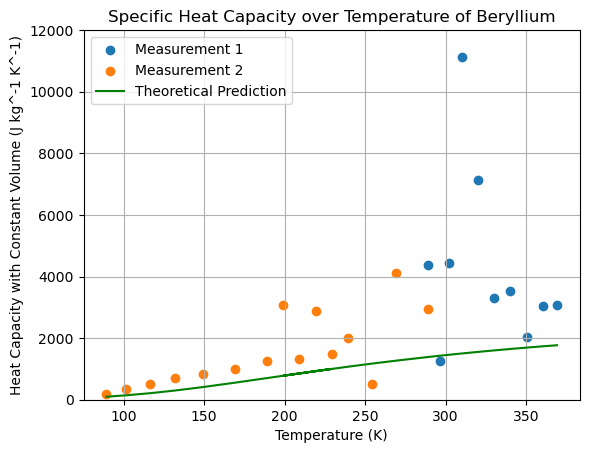

In [16]:
plt.figure()

plt.scatter(temperatures_middle,result_arr_measure1,label = 'Measurement 1')
plt.scatter(temperatures_middle,result_arr_measure2, label = 'Measurement 2')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity with Constant Volume (J kg^-1 K^-1)')
plt.title('Specific Heat Capacity over Temperature of Beryllium')
plt.grid()
plt.ylim(0,12000)


N_A = 6.022e+23

c_be_l = 12890

c_be_t = 8880

c_expected = (3/(1/(c_be_l**2) + 2/(c_be_t**2)))**(1/3)

Vol = m_be / rho_be

omega_be = (6 * N_A * np.pi**2 * c_expected**3 * 1/Vol)**(1/3)

h_bar = 1.05457e-34

k_B = 1.340649e-23

theta_be = omega_be*h_bar/k_B

theta_be = 1160

def fcv(x):
    return x**3 / (np.exp(x)-1)
    
def debye(x):
    return 12*x**(-3)*scipy.integrate.quad(fcv,0,x)[0] - 3*x/(np.exp(x) - 1)

def cv(T,theta,M):
    return 3*R*debye(theta/T)/M

cv_vectorized = np.vectorize(cv)


plt.plot(temperatures_middle,cv_vectorized(temperatures_middle,theta_be,M_be),label = 'Theoretical Prediction', color = 'green')

plt.legend()
plt.savefig('specific_heat.png')

print('Topraks specific heat ',cv_vectorized(temperatures_middle,theta_be,M_be))

print('Temperature  (M1):', temperatures_middle)
print('Specific Heat Capacity  (M1):', result_arr_measure1)
print('Temperature  (M2):', temperatures_middle)
print('Specific Heat Capacity  (M2):', result_arr_measure2)